# Homework 2

California Housing Prices

In [93]:
import pandas as pd

df = pd.read_csv('housing.csv')

In [94]:
df.shape

(20640, 10)

In [95]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

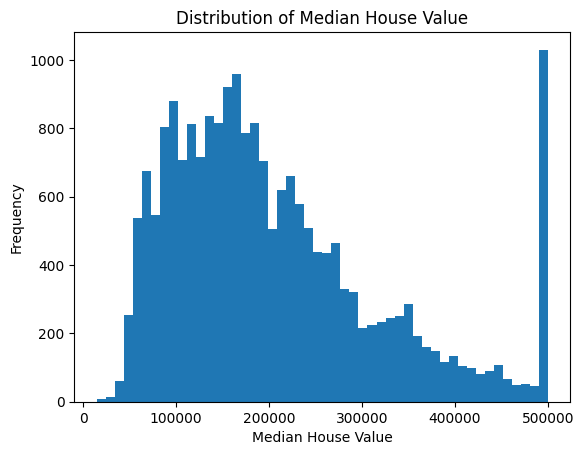

In [96]:
import matplotlib.pyplot as plt

plt.hist(df['median_house_value'], bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

there is a long tail as the median housing value is max frequency ooccurs at extreme value of 500000

In [97]:
df.median_house_value.value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [98]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

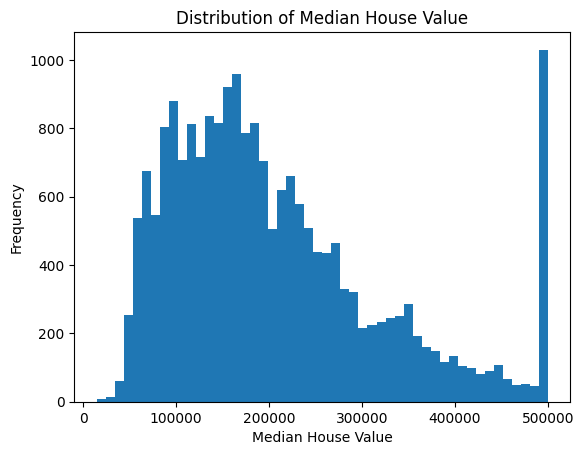

In [99]:
import numpy as np
plt.hist(df.median_house_value, bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

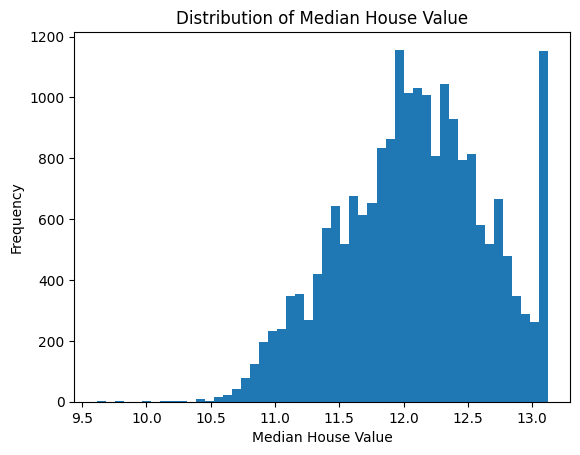

In [100]:
plt.hist(np.log1p(df.median_house_value), bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

# Preparing the data 
[ small subset of ocean_proximity is either '<1H OCEAN' or 'INLAND']

In [101]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [102]:
df_data=df[(df['ocean_proximity']=='INLAND') |(df['ocean_proximity'] =='<1H OCEAN')]
df_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [103]:
df_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64

In [104]:
df_data = df_data.drop('ocean_proximity', axis=1)
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# 1. There's one feature with missing values. What is it?

In [105]:
df_data.isnull().sum()  # total_bedrooms is having missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# 2. What's the median (50% percentile) for variable 'population'?

In [106]:
df_data.population.median()

1195.0

# Prepare and split the data

In [107]:
def prepare_data_df_with_shuffle(df_data,seed=42):   
    n = len(df_data)
    df_data = df_data.sample(frac=1, random_state=seed)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_data.median_house_value=np.log1p(df_data.median_house_value)
    df_train = df_data.iloc[:n_train].reset_index(drop=True)
    df_val = df_data.iloc[n_train:n_train+n_val].reset_index(drop=True)
    df_test = df_data.iloc[n_train+n_val:].reset_index(drop=True)
    y_train=df_train.median_house_value.values
    y_val=df_val.median_house_value.values
    y_test=df_test.median_house_value.values
    return df_train, df_val, df_test, y_train, y_val, y_test

In [108]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data_df_with_shuffle(df_data,seed=42)

# linear regression

In [109]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [110]:
base = df_train.columns.drop('median_house_value')

In [111]:
base

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [112]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [113]:
def prepare_X(df,m):
    df_num = df[base]
    if(m==0):
        df_num = df_num.fillna(0)
    else:
        df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X



# 3. With 0, With mean or Both are equally good

In [114]:
# strategy of fill 0 for missing values
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [115]:
# strategy of fill mean for missing values
X_train = prepare_X(df_train,1)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,5)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)


0.34

There is no big difference in the strategy in the methods.Both are equally good.

# linear regression with regularization

In [116]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# 4. smallest r

In [117]:
# strategy of fill 0 for missing values with linear regression [regularization]
results = []

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    results.append({'score': score, 'r': r})
    
result_df=pd.DataFrame(results,columns=['score','r']).sort_values('score')
result_df

,score,r
0,0.34,0.000000
1,0.34,0.000001
2,0.34,0.000100
3,0.34,0.001000
4,0.34,0.010000
5,0.34,0.100000
6,0.34,1.000000
7,0.35,5.000000
8,0.35,10.000000


# 5. different seed value

In [118]:
seed_influence = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data_df_with_shuffle(df_data,seed=i)
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    seed_influence.append(score)

round(np.std(seed_influence),4)

0.0055

# 6. Combine train and val and predict with regularization

In [119]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data_df_with_shuffle(df_data,seed=9)
y_train=np.append(y_train,y_val)
X_train = prepare_X(pd.concat([df_train,df_val]),0)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.001)
X_test = prepare_X(df_test,0)
y_pred = w0 + X_val.dot(w)
score=round(rmse(y_test, y_pred),4)
score

0.7123